In [ ]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
 
# Path where your Parquet files are stored
folder_path = "/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023"    # Update this with your actual path

In [65]:
print(folder_path)

/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023


In [67]:
 # Get a list of all Parquet files in the folder

file_list = glob.glob(rf"{folder_path}/*.parquet")
file_list

['/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-06.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-07.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-05.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-04.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-08.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-11.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-01.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-10.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-09.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-12.parquet',
 '/Users/nabinagahatraj/Desktop/NYC yellow taxi data/2023/yellow_tripdata_2023-0

In [69]:
 # Read and combine all Parquet files


combined_df = pd.concat([pd.read_parquet(file) for file in file_list], ignore_index=True)



In [70]:
combined_df


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.90,3.50,0.5,6.70,0.0,1.0,33.60,2.5,0.00,NaN
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.60,3.50,0.5,3.00,0.0,1.0,23.60,2.5,0.00,NaN
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.80,7.75,0.5,10.00,0.0,1.0,60.05,0.0,1.75,NaN
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.40,1.00,0.5,8.88,0.0,1.0,53.28,2.5,0.00,NaN
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.30,1.00,0.5,0.72,0.0,1.0,15.02,2.5,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38310221,2,2023-03-31 23:24:25,2023-03-31 23:40:54,NaN,3.16,NaN,None,163,75,0,12.13,0.00,0.5,4.23,0.0,1.0,20.36,NaN,NaN,NaN
38310222,2,2023-03-31 23:24:50,2023-04-01 00:04:12,NaN,6.89,NaN,None,125,198,0,40.92,0.00,0.5,8.98,0.0,1.0,53.90,NaN,NaN,NaN
38310223,2,2023-03-31 23:26:31,2023-03-31 23:49:39,NaN,4.01,NaN,None,50,224,0,24.02,0.00,0.5,0.00,0.0,1.0,28.02,NaN,NaN,NaN
38310224,2,2023-03-31 23:07:51,2023-03-31 23:15:56,NaN,1.31,NaN,None,113,158,0,8.51,0.00,0.5,3.50,0.0,1.0,16.01,NaN,NaN,NaN


In [73]:
# Save the combined file

combined_df.to_parquet("NYC Yellow Taxi 2023", index=False)  # Save as Parquet

In [74]:
#Let's read the combined file 

df = pd.read_parquet('/Users/nabinagahatraj/Desktop/NYC yellow taxi data/NYC Yellow Taxi 2023', engine='pyarrow')  # or engine='fastparquet'

In [75]:
# Display the first few rows of the DataFrame
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.9,3.50,0.5,6.70,0.0,1.0,33.60,2.5,0.00,NaN
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.6,3.50,0.5,3.00,0.0,1.0,23.60,2.5,0.00,NaN
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.8,7.75,0.5,10.00,0.0,1.0,60.05,0.0,1.75,NaN
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.4,1.00,0.5,8.88,0.0,1.0,53.28,2.5,0.00,NaN
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.3,1.00,0.5,0.72,0.0,1.0,15.02,2.5,0.00,NaN


In [79]:
df.shape      #Checking the shape of the Dataset


(38310226, 20)

In [81]:
df.dtypes     #Checking the data types of each column

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
airport_fee                     float64
dtype: object

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38310226 entries, 0 to 38310225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

In [85]:
#Let's Check for the Null Values
df.isnull().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count           1309356
trip_distance                   0
RatecodeID                1309356
store_and_fwd_flag        1309356
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge      1309356
Airport_fee               4304379
airport_fee              35315203
dtype: int64

#### It can be observed that this dataset has a significant amount of null values.


In [209]:
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,combined_airport_fee,month,day_of_week,hour,pickup_hour,dropoff_hour,pickup_day,pickup_month
count,1.793758e+07,17937578,17937578,17937578.0,1.793758e+07,17937578.0,17937578.0,1.793758e+07,1.793758e+07,17937578.0,...,1.793758e+07,17937578.0,17937578.0,1.793758e+07,1.793758e+07,1.793758e+07,1.793758e+07,1.793758e+07,1.793758e+07,1.793758e+07
mean,1.751343e+00,2023-06-30 18:53:47.327107,2023-06-30 19:06:31.598316,1.0,1.778006e+00,1.0,0.0,1.712806e+02,1.696256e+02,1.0,...,2.073291e+01,2.5,0.0,6.474703e+00,2.910707e+00,1.425026e+01,1.425026e+01,1.430315e+01,2.910707e+00,6.474703e+00
min,1.000000e+00,2003-01-01 00:03:31,2003-01-01 14:54:12,1.0,0.000000e+00,1.0,0.0,4.000000e+00,4.000000e+00,1.0,...,4.000000e+00,2.5,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000000e+00,2023-03-30 14:05:02,2023-03-30 14:19:00,1.0,9.900000e-01,1.0,0.0,1.400000e+02,1.370000e+02,1.0,...,1.575000e+01,2.5,0.0,3.000000e+00,1.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+00,3.000000e+00
50%,2.000000e+00,2023-06-24 00:15:43,2023-06-24 00:28:22.500000,1.0,1.510000e+00,1.0,0.0,1.630000e+02,1.630000e+02,1.0,...,1.966000e+01,2.5,0.0,6.000000e+00,3.000000e+00,1.500000e+01,1.500000e+01,1.500000e+01,3.000000e+00,6.000000e+00
75%,2.000000e+00,2023-10-05 21:20:12.750000,2023-10-05 21:33:10.750000,1.0,2.300000e+00,1.0,0.0,2.360000e+02,2.360000e+02,1.0,...,2.480000e+01,2.5,0.0,1.000000e+01,4.000000e+00,1.900000e+01,1.900000e+01,1.900000e+01,4.000000e+00,1.000000e+01
max,2.000000e+00,2023-12-31 23:59:59,2024-01-01 23:02:22,1.0,6.740000e+00,1.0,0.0,2.650000e+02,2.650000e+02,1.0,...,3.895000e+01,2.5,0.0,1.200000e+01,6.000000e+00,2.300000e+01,2.300000e+01,2.300000e+01,6.000000e+00,1.200000e+01
std,4.322348e-01,NaN,NaN,0.0,1.082621e+00,0.0,0.0,6.398810e+01,6.712259e+01,0.0,...,6.433535e+00,0.0,0.0,3.479567e+00,1.891080e+00,5.774100e+00,5.774100e+00,5.848164e+00,1.891080e+00,3.479567e+00


### Data Cleaning

In [91]:
#check for duplicates
duplicates = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 2


In [93]:
#let's drop the duplicates
# Remove duplicate rows (keeping the first occurrence)
df_cleaned = df.drop_duplicates()


In [95]:
#Replacing the Null Values in columns Airport_fee and airport_fee with 0
df["airport_fee"] = df["airport_fee"].fillna(0) 
df["Airport_fee"] = df["Airport_fee"].fillna(0)  


In [97]:
#Now lets create a the combined value by summing up
df["combined_airport_fee"] = df["airport_fee"] + df["Airport_fee"]

In [99]:
#Now let's drop those columns
df = df.drop(columns=["airport_fee", "Airport_fee"])

In [103]:
#Let's do imputation of the passenger_count columns with its mean

mean_passenger_count = df["passenger_count"].mean()
df.fillna({"passenger_count": mean_passenger_count}, inplace=True)

In [105]:
#check if the imputation was done correctly
df["passenger_count"].isnull().sum()

0

In [107]:
#Now let's replace the missing values in the RatecodeID with it's mean
unique_values = df["RatecodeID"].unique()

print(unique_values)

[ 1.  2.  4. 99.  5.  3.  6. nan]


In [109]:
RatecodeID_mean = df["RatecodeID"].mean()
df.fillna({"RatecodeID": RatecodeID_mean}, inplace= True)

In [111]:
df["RatecodeID"].isnull().sum()

0

In [113]:
#Now let's handle the missing values in store_and_fwd_flag column
unique_values = df["store_and_fwd_flag"].unique()

print(unique_values)

['N' 'Y' None]


In [115]:
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].replace({"N": 0, "Y": 1, None: 2})

/var/folders/dl/4lcldw7n1gnbk9r573r1pvvm0000gn/T/ipykernel_31825/1599396870.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["store_and_fwd_flag"] = df["store_and_fwd_flag"].replace({"N": 0, "Y": 1, None: 2})


In [117]:
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].fillna(2)

In [119]:
unique_values = df["store_and_fwd_flag"].unique()

print(unique_values)

[0. 1. 2.]


In [121]:
#Now let's replace the missing values in the column congestion_surcharge with it's mean
mean_passenger_count = df["congestion_surcharge"].mean()
df.fillna({"congestion_surcharge": mean_passenger_count}, inplace=True)

In [123]:
#Check for NUll values again
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
combined_airport_fee     0
dtype: int64

#### So all the missing values has been handled and the dataset has no null values now.

### Outliers Handling

In [ ]:


# Plot boxplots for all numerical columns
#plt.figure(figsize=(12, 6))
#df.select_dtypes(include=[np.number]).boxplot()
#plt.xticks(rotation=90)
#plt.title("Boxplot for Outlier Detection")
#plt.show()

#### Using IQR (Interquartile Range) Method
The IQR method identifies outliers based on the spread of the middle 50% of the data.


In [131]:
#defining a function to detect outliers in the dataset
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)  # First quartile
    Q3 = df.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Identify outliers using IQR
outliers_iqr = detect_outliers_iqr(df.select_dtypes(include=[np.number]))
print("Outliers detected using IQR:\n", outliers_iqr)

Outliers detected using IQR:
           VendorID  passenger_count  trip_distance  RatecodeID  \
1                1         0.000000           3.40    1.000000   
2                1         1.000000          10.20    1.000000   
3                2         3.000000           9.83    1.000000   
5                1         2.000000           3.60    1.000000   
7                1         2.000000           1.10    1.000000   
...            ...              ...            ...         ...   
38310221         2         1.370426           3.16    1.641906   
38310222         2         1.370426           6.89    1.641906   
38310223         2         1.370426           4.01    1.641906   
38310224         2         1.370426           1.31    1.641906   
38310225         2         1.370426           0.88    1.641906   

          store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
1                        0.0            50           151             1   
2                        0.0 

In [132]:
#Defining a Function to remove outliers using IQR
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:  #Select only numeric columns
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply function to DataFrame
df = remove_outliers(df)

In [145]:
df.shape

(17937578, 19)

#### Let's view the distribution of the Trip distance

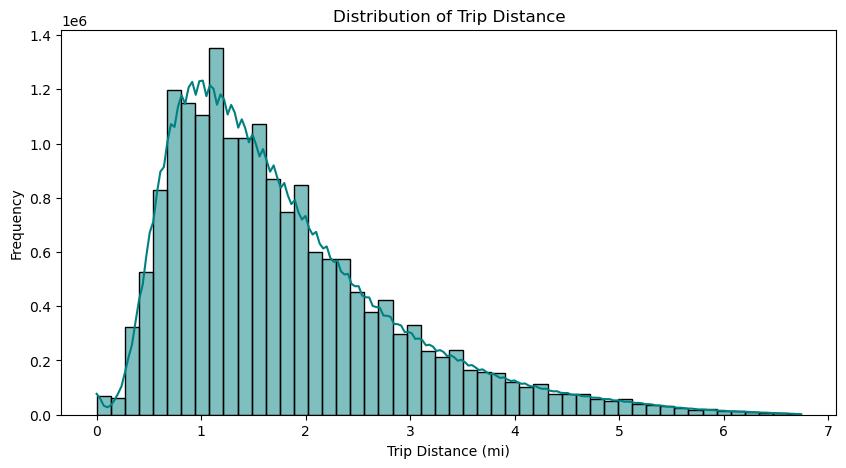

In [150]:
plt.figure(figsize=(10, 5))  # Set figure size

# Create histogram
sns.histplot(df["trip_distance"], bins=50, kde=True, color="teal")

# Labels and title
plt.xlabel("Trip Distance (mi)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distance")

# Show the plot
plt.show()

#### The histogram suggests that the distribution is positively skewed which reveals that the majority of the trips were being accounted for  shorter distances than in longer distances.


### Let's view the distribution of the Fare_amount

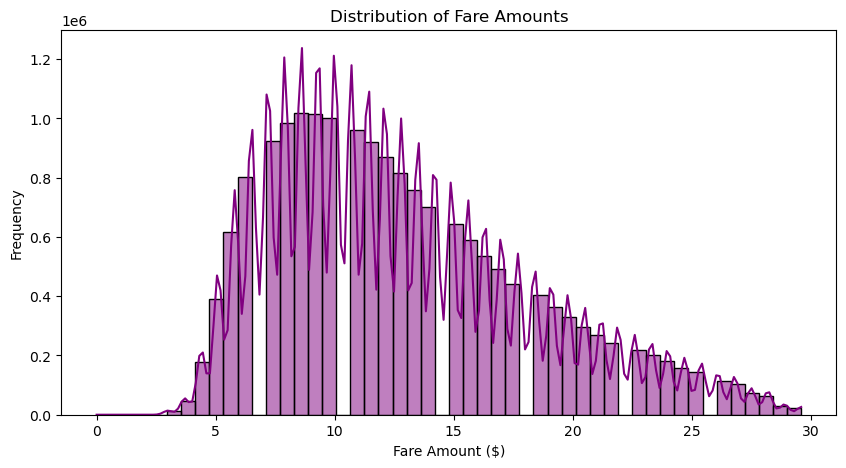

In [156]:

plt.figure(figsize=(10, 5))  # Set figure size

# Create histogram
sns.histplot(df["fare_amount"], bins=50, kde=True, color="purple")

# Labels and title
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Fare Amounts")

# Show the plot
plt.show()

#### The histogram suggests that the distribution of the data was positively skewed with majority of the rides being accounted for on the lower side of the fares.


### Now let's do timestamp analysis from the dataset

In [160]:
#Converting into datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [162]:
#Extracting the month, day and time from the pickup datetime

df["month"] = df["tpep_pickup_datetime"].dt.month  # Extract month (1-12)
df["day_of_week"] = df["tpep_pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6
df["hour"] = df["tpep_pickup_datetime"].dt.hour  # Extract hour (0-23)

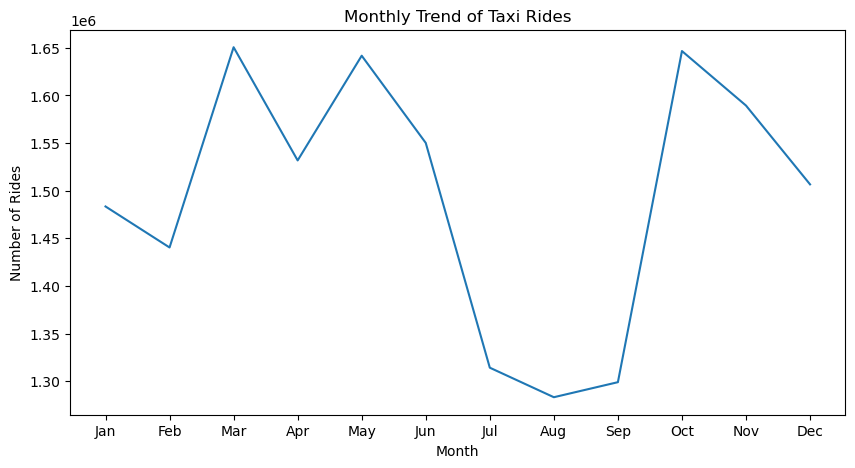

In [164]:
#Plotting the monthly trend graph

plt.figure(figsize=(10, 5))
sns.lineplot(x=df["month"].value_counts().sort_index().index, 
             y=df["month"].value_counts().sort_index().values)

plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Monthly Trend of Taxi Rides")
plt.show()

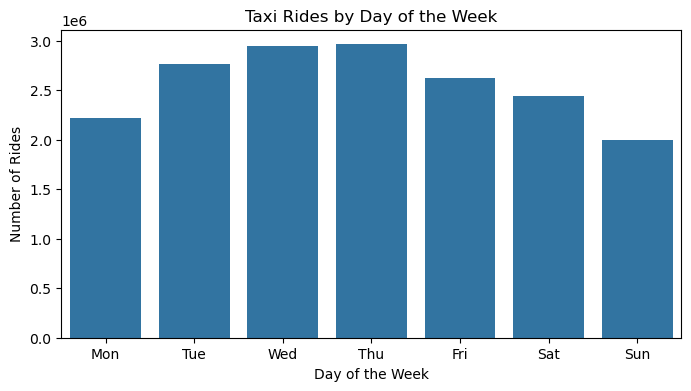

In [166]:
#Plotting the graph by days of the week

plt.figure(figsize=(8, 4))
sns.barplot(x=df["day_of_week"].value_counts().sort_index().index, 
            y=df["day_of_week"].value_counts().sort_index().values)

plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.title("Taxi Rides by Day of the Week")
plt.show()

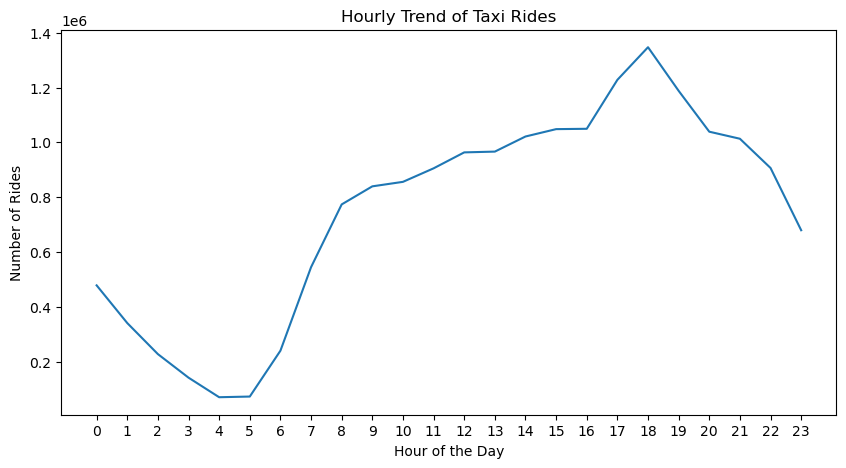

In [168]:
#Plotting the hourly trend graph

plt.figure(figsize=(10, 5))
sns.lineplot(x=df["hour"].value_counts().sort_index().index, 
             y=df["hour"].value_counts().sort_index().values)

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Hourly Trend of Taxi Rides")
plt.xticks(range(0, 24))
plt.show()


### Let's visualize the different fare components and their contribution to the total revenue.

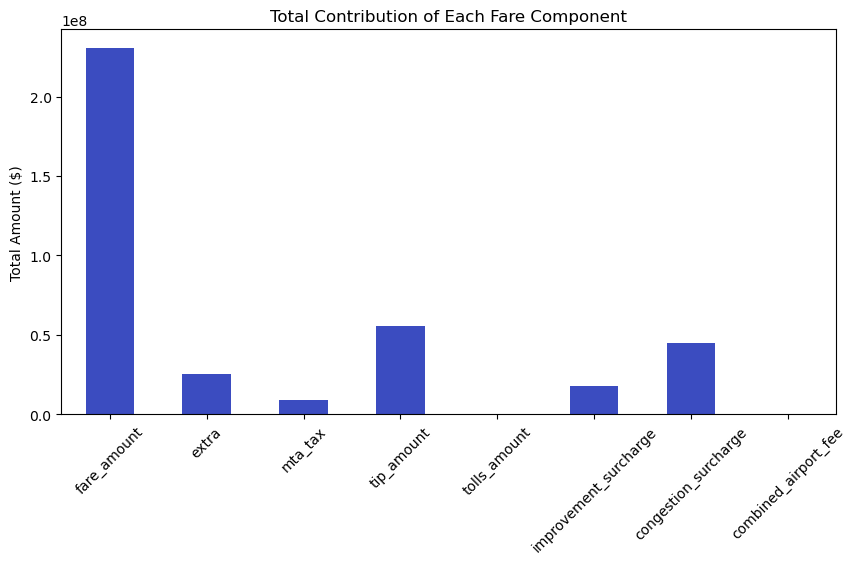

In [190]:

df_total_revenue = df[[
    "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
    "improvement_surcharge", "congestion_surcharge", "combined_airport_fee"
]].sum()

df_total_revenue.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")

plt.ylabel("Total Amount ($)")
plt.title("Total Contribution of Each Fare Component")
plt.xticks(rotation=45)
plt.show()




### Correlation Heatmap


In [193]:
# Extracting the relevant datetime features for correlation heatmap plotting
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour      #extracting hour
df["dropoff_hour"] = df["tpep_dropoff_datetime"].dt.hour
df["pickup_day"] = df["tpep_pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6
df["pickup_month"] = df["tpep_pickup_datetime"].dt.month

In [195]:
numerical_columns = [
   "trip_distance","fare_amount", 
    "extra", "tip_amount","total_amount", "pickup_hour", "dropoff_hour", "pickup_day", "pickup_month"
]

In [197]:
correlation_matrix = df[numerical_columns].corr()

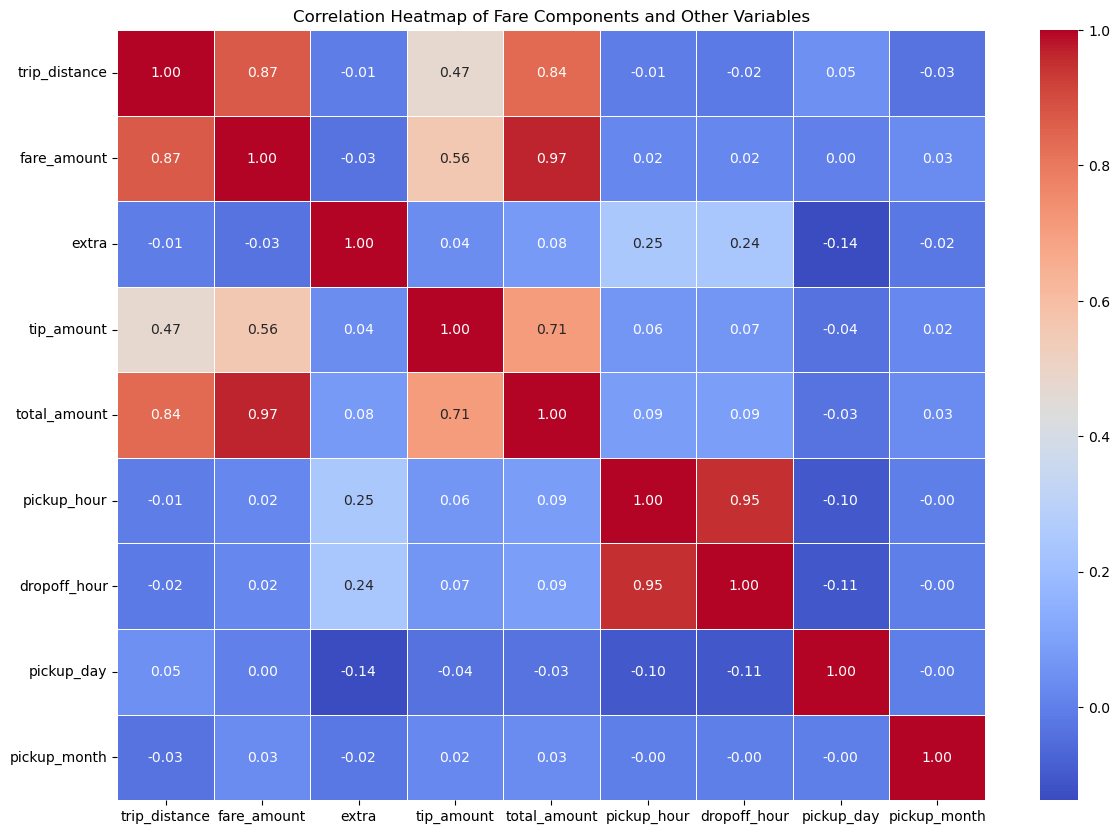

In [199]:
#Plotting the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Labels and title
plt.title("Correlation Heatmap of Fare Components and Other Variables")
plt.show()

### The heatmap reveals that trip_distance and fare_amount, total_amount and trip_distance, total_amount and fare_amount these variables are highly correlated to each other.

### Let's visualize the top 10 most frequent pickup and drop-off locations now

/var/folders/dl/4lcldw7n1gnbk9r573r1pvvm0000gn/T/ipykernel_31825/4069419330.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.index, y=top_pickups.values, palette="pastel")


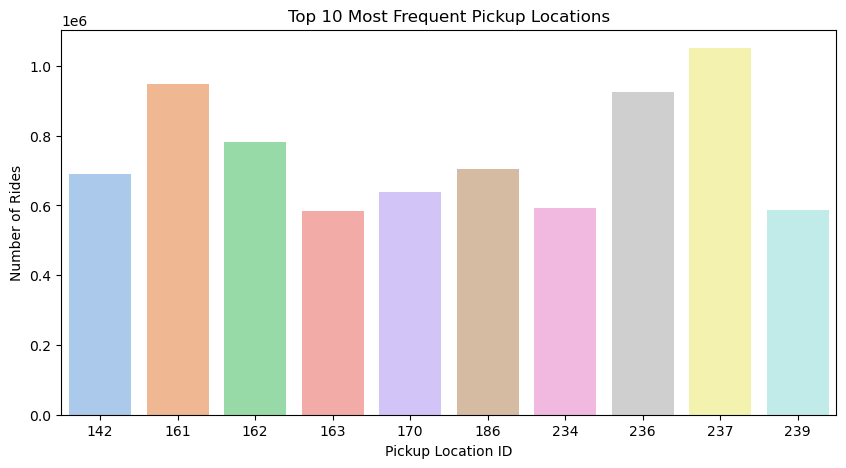

In [207]:
#Top 10 pickup locations
top_pickups = df["PULocationID"].value_counts().head(10)  # Top 10 locations

# Plot the most frequent pickup locations
plt.figure(figsize=(10, 5))
sns.barplot(x=top_pickups.index, y=top_pickups.values, palette="pastel")

# Labels and title
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Rides")
plt.title("Top 10 Most Frequent Pickup Locations")

# Show plot
plt.show()

/var/folders/dl/4lcldw7n1gnbk9r573r1pvvm0000gn/T/ipykernel_31825/3730991193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.index, y=top_pickups.values, palette="deep")


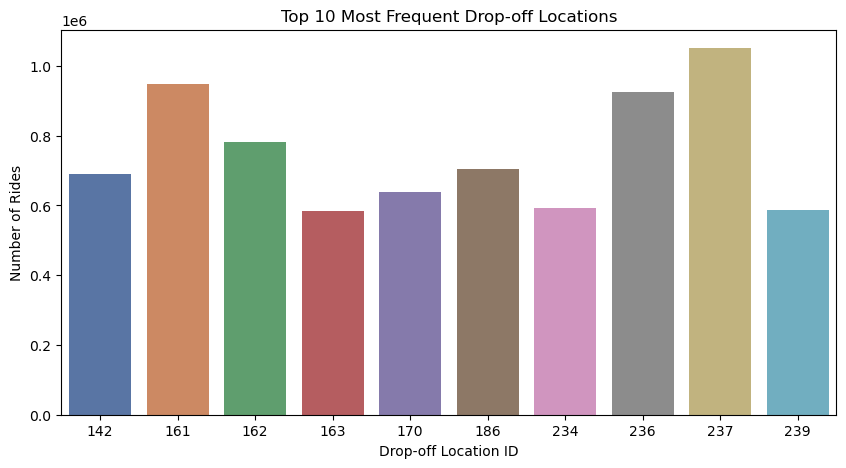

In [205]:
#Top 10 Dropoff locations
top_dropoffs = df["DOLocationID"].value_counts().head(10)  # Top 10 locations

# Plot the most frequent pickup locations
plt.figure(figsize=(10, 5))
sns.barplot(x=top_pickups.index, y=top_pickups.values, palette="deep")

# Labels and title
plt.xlabel("Drop-off Location ID")
plt.ylabel("Number of Rides")
plt.title("Top 10 Most Frequent Drop-off Locations")

# Show plot
plt.show()